In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# blue
color_0 = '#1f77b4'
color_0_light = '#8fbbd9'

# orange
color_1 = '#ff7f0e'
color_1_light = '#ffbf86'

colors = [color_0, color_1]
colors_light = [color_0_light,color_1_light]

# other constants
lower_percentile = 0.159
upper_percentile = 0.841

plt.rcParams.update({'font.size': 24,
                     'xtick.labelsize': 20,
                     'ytick.labelsize': 20,
                     'axes.titlesize': 28,
                     'axes.labelsize': 28,
                     'mathtext.fontset': 'stix',
                     'font.family': 'STIXGeneral'})

In [9]:
margin=0.1
C = 10.
df = pd.read_csv(f'experiments/M_{margin}_data.csv')
sep = 'separable' if margin > 0 else 'overlap'

In [13]:
df = df[df['shots'] > -1]
df = df[df['C'] == C]

In [14]:
Ms = list(set(df['M']))
Ms.sort()
Ms = np.array(Ms)
epsilons = list(set(df['epsilon']))
epsilons.sort()
epsilons = np.array(epsilons)

6


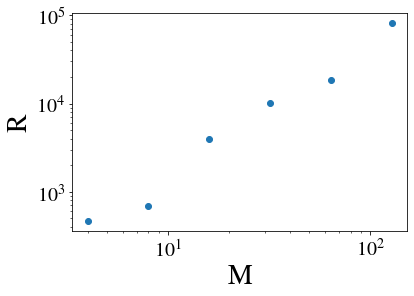

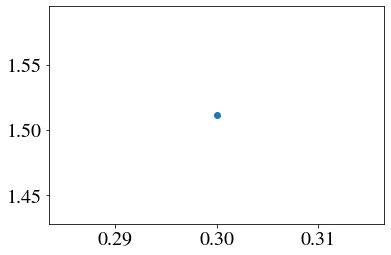

In [15]:
exponents = np.zeros(epsilons.shape)
for i, eps in enumerate(epsilons):
    R_needed = np.array([np.mean(df['shots'][(df['M'] == M) & (df['epsilon'] == eps)]) for M in Ms])
    filter = np.invert(np.isnan(R_needed))
    print(np.sum(filter))
    plt.scatter(Ms[filter],R_needed[filter])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('M')
    plt.ylabel('R')
    p = np.polyfit(np.log(Ms[filter]),np.log(R_needed[filter]),1)
    exponents[i] = p[0]
plt.figure()
plt.scatter(epsilons,exponents)

In [28]:
epsilons

array([0.1, 0.2, 0.3])